# Capstone Week 1
---

## Capstone Objectives
- Assist sales and marketing by improving their targeting, and allowing them to correctly assign coverage channels
- Predict sales for 2020 using the data for 2018 and 2019
    - Determine the optimal number of models that need to be built
    - Develop several regression analyses and show the lift that will be achieved through your models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

pd.set_option('display.max_columns', 50)

## Remember the data science workflow
<img src="../data_science_workflow.png" width="400px">

# Read in Data

In [2]:
ls ../

Data Dictionary.xlsx            Notebooks/
Firm Information.xlsx           README.md
LICENSE                         Transaction_Data_20210128.xlsx
Lift Chart Template.xlsx


In [5]:
df = pd.read_excel(
    '../Transaction_Data_20210128.xlsx', 
    sheet_name='36 Rolling Months',
    usecols='B:AN',
    header=1,
    skiprows=0
)

In [6]:
firms = pd.read_excel(
    "../Firm Information.xlsx", 
    sheet_name='Rep summary', 
    header=0
)

In [7]:
df.head()

,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M,redemption_curr,redemption_12M,new_Fund_added_12M,redemption_rate,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,refresh_date
0,85102111664960504040,3096,6592,302,157,8,13,7,7,2,3,2,2,9,2,1.909702e+07,399995.834888,1.259993e+07,-231714.43334,-6.557185e+06,0,-0.012133,9.386941e+06,9.743856e+06,-9655.913728,0.0,-24116.993988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.431248e+06,1.066578e+07,0.0,0.0,2017-12-31
1,4492101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.468574e+04,0.000000,0.000000e+00,0.00000,0.000000e+00,0,0.000000,-7.102100e+03,0.000000e+00,-7583.640000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.468574e+04,0.000000e+00,0.0,0.0,2017-12-31
2,85102140943881291064,0,1,0,0,0,1,0,0,0,1,0,0,0,0,-7.164047e+04,0.000000,0.000000e+00,0.00000,-1.950000e+02,0,0.000000,-7.164047e+04,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.164047e+04,0.000000e+00,0.0,0.0,2017-12-31
3,85202121774856516280,1,0,0,0,1,0,0,0,1,0,0,0,2,2,3.425462e+05,0.000000,1.164760e+03,0.00000,0.000000e+00,1,0.000000,0.000000e+00,7.030151e+04,272244.700000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.425462e+05,0.000000e+00,0.0,0.0,2017-12-31
4,0360380,7,0,0,0,1,0,0,0,1,0,0,0,2,0,-2.262721e+05,0.000000,3.278145e+03,0.00000,0.000000e+00,0,0.000000,-1.113566e+05,-2.018566e+04,0.000000,0.0,-94729.890000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.315423e+05,-9.472989e+04,0.0,0.0,2017-12-31


In [8]:
firms.head()

,Contact ID,CustomerID,Firm ID,Office ID,Channel,Sub channel,Firm name
0,0000286,1,1948520,17993101120,National Broker-Dealer,NACS,Morgan Stanley Wealth Management
1,0000422,2,1688552,85202111664692445495,National Broker-Dealer,NACS,"UBS Financial Services, Inc."
2,0000508,3,1567450,15674503441,National Broker-Dealer,NACS,Merrill Lynch
3,0000604,4,0022885,85102132106001250782,Independent Dealer,IBD,LPL Financial LLC
4,0000657,5,1567450,15674501882,National Broker-Dealer,NACS,Merrill Lynch


# Look at the data types

In [9]:
df.dtypes

CONTACT_ID                                     object
no_of_sales_12M_1                               int64
no_of_Redemption_12M_1                          int64
no_of_sales_12M_10K                             int64
no_of_Redemption_12M_10K                        int64
no_of_funds_sold_12M_1                          int64
no_of_funds_redeemed_12M_1                      int64
no_of_fund_sales_12M_10K                        int64
no_of_funds_Redemption_12M_10K                  int64
no_of_assetclass_sold_12M_1                     int64
no_of_assetclass_redeemed_12M_1                 int64
no_of_assetclass_sales_12M_10K                  int64
no_of_assetclass_Redemption_12M_10K             int64
No_of_fund_curr                                 int64
No_of_asset_curr                                int64
AUM                                           float64
sales_curr                                    float64
sales_12M                                     float64
redemption_curr             

## Look at the `refresh_date` column

In [10]:
df['refresh_date'].describe(datetime_is_numeric=True)

count                           360325
mean     2019-06-15 17:31:06.664816128
min                2017-12-31 00:00:00
25%                2018-08-31 00:00:00
50%                2019-05-31 00:00:00
75%                2020-02-29 00:00:00
max                2020-11-30 00:00:00
Name: refresh_date, dtype: object

# Look at number of rows and unique advisors

In [11]:
df['CONTACT_ID'].shape

(360325,)

In [12]:
df['CONTACT_ID'].nunique()

10010

In [13]:
df.columns

Index(['CONTACT_ID', 'no_of_sales_12M_1', 'no_of_Redemption_12M_1',
       'no_of_sales_12M_10K', 'no_of_Redemption_12M_10K',
       'no_of_funds_sold_12M_1', 'no_of_funds_redeemed_12M_1',
       'no_of_fund_sales_12M_10K', 'no_of_funds_Redemption_12M_10K',
       'no_of_assetclass_sold_12M_1', 'no_of_assetclass_redeemed_12M_1',
       'no_of_assetclass_sales_12M_10K', 'no_of_assetclass_Redemption_12M_10K',
       'No_of_fund_curr', 'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M',
       'redemption_curr', 'redemption_12M', 'new_Fund_added_12M',
       'redemption_rate', 'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
       'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
       'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
       'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
       'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT', 'refresh_date'],
      dtype='object')

# Combine `sales_curr` and `sales_12M`

In [14]:
df['total_sales'] = df['sales_curr'] + df['sales_12M']

# Data Cleaning

Before you change ANYTHING with the data - besides the above :) - do your train-test split

In [15]:
FEATURES = [
    'CONTACT_ID', 'no_of_sales_12M_1', 'no_of_Redemption_12M_1',
    'no_of_sales_12M_10K', 'no_of_Redemption_12M_10K',
    'no_of_funds_sold_12M_1', 'no_of_funds_redeemed_12M_1',
    'no_of_fund_sales_12M_10K', 'no_of_funds_Redemption_12M_10K',
    'no_of_assetclass_sold_12M_1', 'no_of_assetclass_redeemed_12M_1',
    'no_of_assetclass_sales_12M_10K', 'no_of_assetclass_Redemption_12M_10K',
    'No_of_fund_curr', 'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M',
    'redemption_curr', 'redemption_12M', 'new_Fund_added_12M',
    'redemption_rate', 'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
    'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
    'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
    'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
    'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT', 'refresh_date',
]
TARGETS = 'total_sales'

## Partition training and testing

In [16]:
training_rows = df['refresh_date'].dt.year.isin([2017, 2018, 2019])
testing_rows = df['refresh_date'].dt.year.isin([2020])

X = df.loc[training_rows, FEATURES].copy()
y = df.loc[training_rows, TARGETS].copy()

y_holdout_test = df.loc[testing_rows, TARGETS].copy() # forget about this for now

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

Let's create functions that do some basic housekeeping

In [19]:
X_train.columns

Index(['CONTACT_ID', 'no_of_sales_12M_1', 'no_of_Redemption_12M_1',
       'no_of_sales_12M_10K', 'no_of_Redemption_12M_10K',
       'no_of_funds_sold_12M_1', 'no_of_funds_redeemed_12M_1',
       'no_of_fund_sales_12M_10K', 'no_of_funds_Redemption_12M_10K',
       'no_of_assetclass_sold_12M_1', 'no_of_assetclass_redeemed_12M_1',
       'no_of_assetclass_sales_12M_10K', 'no_of_assetclass_Redemption_12M_10K',
       'No_of_fund_curr', 'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M',
       'redemption_curr', 'redemption_12M', 'new_Fund_added_12M',
       'redemption_rate', 'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
       'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
       'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
       'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
       'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT', 'refresh_date'],
      dtype='object')

In [20]:
# make a variable to keep all of the columns we want to drop
COLS_TO_DROP = [
    'CONTACT_ID', 'sales_curr', 'sales_12M', 
    'refresh_date', 'new_Fund_added_12M',
]

COLS_TO_KEEP = [
    'no_of_sales_12M_1', 'no_of_Redemption_12M_1',
    'no_of_sales_12M_10K', 'no_of_Redemption_12M_10K',
    'no_of_funds_sold_12M_1', 'no_of_funds_redeemed_12M_1',
    'no_of_fund_sales_12M_10K', 'no_of_funds_Redemption_12M_10K',
    'no_of_assetclass_sold_12M_1', 'no_of_assetclass_redeemed_12M_1',
    'no_of_assetclass_sales_12M_10K', 'no_of_assetclass_Redemption_12M_10K',
    'No_of_fund_curr', 'No_of_asset_curr', 'AUM', 'redemption_curr', 
    'redemption_12M', 'redemption_rate', 'aum_AC_EQUITY', 
    'aum_AC_FIXED_INCOME_MUNI', 'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 
    'aum_AC_MULTIPLE', 'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 
    'aum_AC_TARGET', 'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 
    'aum_P_MF', 'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT',
]

In [21]:
def extract_columns(df):
    '''extract out columns not listed in COLS_TO_DROP variable'''
    cols_to_keep = [col for col in df.columns if col not in COLS_TO_DROP]
    return df.loc[:, cols_to_keep].copy()

In [22]:
X_train1 = extract_columns(X_train)
X_train1.head()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,redemption_curr,redemption_12M,redemption_rate,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
244853,0,0,0,0,0,0,0,0,0,0,0,0,1,1,12250.00,0.0,0.00,0.0,0.00,12250.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12250.00,0.0,0.0,0.0
58690,1,0,1,0,1,0,1,0,1,0,1,0,0,0,-29944.41,0.0,0.00,0.0,0.00,-29944.41,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-29944.41,0.0,0.0,0.0
153264,0,0,0,0,0,0,0,0,0,0,0,0,1,1,730175.44,0.0,0.00,0.0,0.00,730175.44,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730175.44,0.0,0.0,0.0
14612,3,4,3,3,1,1,1,1,1,1,1,1,0,0,-294330.53,0.0,-971473.98,0.0,-22837.47,0.00,-271493.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-294330.53,0.0,0.0,0.0
6454,3,0,0,0,1,0,0,0,1,0,0,0,1,1,18212.30,0.0,0.00,0.0,18212.30,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18212.30,0.0,0.0,0.0


## Check out missing values

In [23]:
X_train1.isnull().sum()

no_of_sales_12M_1                      0
no_of_Redemption_12M_1                 0
no_of_sales_12M_10K                    0
no_of_Redemption_12M_10K               0
no_of_funds_sold_12M_1                 0
no_of_funds_redeemed_12M_1             0
no_of_fund_sales_12M_10K               0
no_of_funds_Redemption_12M_10K         0
no_of_assetclass_sold_12M_1            0
no_of_assetclass_redeemed_12M_1        0
no_of_assetclass_sales_12M_10K         0
no_of_assetclass_Redemption_12M_10K    0
No_of_fund_curr                        0
No_of_asset_curr                       0
AUM                                    0
redemption_curr                        0
redemption_12M                         0
redemption_rate                        0
aum_AC_EQUITY                          0
aum_AC_FIXED_INCOME_MUNI               0
aum_AC_FIXED_INCOME_TAXABLE            0
aum_AC_MONEY                           0
aum_AC_MULTIPLE                        0
aum_AC_PHYSICAL_COMMODITY              0
aum_AC_REAL_ESTA

Make function to fill those missing values with `0`. We can refactor this function later if we like.

In [24]:
X_train.select_dtypes(include=['number'])

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M,redemption_curr,redemption_12M,new_Fund_added_12M,redemption_rate,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
244853,0,0,0,0,0,0,0,0,0,0,0,0,1,1,12250.00,12250.00,0.00,0.0,0.00,0,0.000000,0.00,12250.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12250.00,0.0,0.0,0.0
58690,1,0,1,0,1,0,1,0,1,0,1,0,0,0,-29944.41,0.00,11775.00,0.0,0.00,0,0.000000,0.00,-29944.41,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-29944.41,0.0,0.0,0.0
153264,0,0,0,0,0,0,0,0,0,0,0,0,1,1,730175.44,0.00,0.00,0.0,0.00,0,0.000000,0.00,730175.44,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730175.44,0.0,0.0,0.0
14612,3,4,3,3,1,1,1,1,1,1,1,1,0,0,-294330.53,0.00,384799.26,0.0,-971473.98,0,0.000000,-22837.47,0.00,-271493.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-294330.53,0.0,0.0,0.0
6454,3,0,0,0,1,0,0,0,1,0,0,0,1,1,18212.30,0.00,6981.00,0.0,0.00,0,0.000000,18212.30,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18212.30,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153453,28,12,1,0,2,2,1,0,1,1,1,0,2,1,256660.89,0.00,35624.80,0.0,-17434.85,0,0.000000,365733.00,-109072.11,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256660.89,0.0,0.0,0.0
39785,0,0,0,0,0,0,0,0,0,0,0,0,1,1,12597.60,0.00,0.00,0.0,0.00,0,0.000000,12597.60,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12597.60,0.0,0.0,0.0
49461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1627.59,0.00,0.00,0.0,0.00,0,0.000000,-1627.59,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1627.59,0.0,0.0,0.0
229836,35,7,1,0,3,3,1,0,1,1,1,0,6,1,186955.57,1000.85,67265.58,-36.6,-3876.94,1,-0.000195,186955.57,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186955.57,0.0,0.0,0.0


In [25]:
def fillna_values(df):
    '''fill nan values with zero'''
    if isinstance(df, type(pd.Series(dtype='float64'))):
        return df.fillna(0)
    num_df = df.select_dtypes(include=['number']).fillna(0)
    non_num_df = df.select_dtypes(exclude=['number'])
    return pd.concat([num_df, non_num_df], axis=1)

In [26]:
y_train.isnull().sum()

0

In [27]:
X_train2 = fillna_values(X_train1)
y_train = fillna_values(y_train)

## Standardize Data

In [28]:
ss = StandardScaler()
X_train3 = pd.DataFrame(
    ss.fit_transform(X_train2),
    index=X_train2.index,
    columns=X_train2.columns
)
X_train3.head()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,redemption_curr,redemption_12M,redemption_rate,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
244853,-0.195145,-0.110834,-0.145714,-0.134216,-0.564319,-0.615969,-0.422412,-0.437279,-0.770166,-0.843065,-0.528961,-0.552736,-0.368588,0.066717,-0.102993,0.068143,0.119372,0.002921,-0.023684,-0.088814,-0.052739,-0.006541,-0.025235,-0.039461,-0.028674,-0.041161,-0.074781,-0.025986,-0.083518,-0.014177,-0.069498,-0.062188,-0.019375,-0.071331
58690,-0.184592,-0.110834,-0.084919,-0.134216,-0.133970,-0.615969,0.341266,-0.437279,0.246046,-0.843065,0.908658,-0.552736,-0.686379,-0.886246,-0.115858,0.068143,0.119372,0.002921,-0.023684,-0.104459,-0.052739,-0.006541,-0.025235,-0.039461,-0.028674,-0.041161,-0.074781,-0.025986,-0.083518,-0.014177,-0.084935,-0.062188,-0.019375,-0.071331
153264,-0.195145,-0.110834,-0.145714,-0.134216,-0.564319,-0.615969,-0.422412,-0.437279,-0.770166,-0.843065,-0.528961,-0.552736,-0.368588,0.066717,0.115914,0.068143,0.119372,0.002921,-0.023684,0.177370,-0.052739,-0.006541,-0.025235,-0.039461,-0.028674,-0.041161,-0.074781,-0.025986,-0.083518,-0.014177,0.193164,-0.062188,-0.019375,-0.071331
14612,-0.163487,-0.086992,0.036670,0.088545,-0.133970,-0.201863,0.341266,0.318347,0.246046,0.122349,0.908658,0.827170,-0.686379,-0.886246,-0.196473,0.068143,-0.857629,0.002921,-0.039368,-0.093356,-0.501441,-0.006541,-0.025235,-0.039461,-0.028674,-0.041161,-0.074781,-0.025986,-0.083518,-0.014177,-0.181664,-0.062188,-0.019375,-0.071331
6454,-0.163487,-0.110834,-0.145714,-0.134216,-0.133970,-0.615969,-0.422412,-0.437279,0.246046,-0.843065,-0.528961,-0.552736,-0.368588,0.066717,-0.101175,0.068143,0.119372,0.002921,-0.011177,-0.093356,-0.052739,-0.006541,-0.025235,-0.039461,-0.028674,-0.041161,-0.074781,-0.025986,-0.083518,-0.014177,-0.067316,-0.062188,-0.019375,-0.071331


## Create Pipeline
1. `extract_columns` to drop unneeded columns
2. `fillna_values` to replace nans with 0
3. Standardize data

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

extract_columns_trans = FunctionTransformer(extract_columns)
fillna_values_trans = FunctionTransformer(fillna_values)

fillna_values_trans.transform(X_train)

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M,redemption_curr,redemption_12M,new_Fund_added_12M,redemption_rate,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,CONTACT_ID,refresh_date
244853,0,0,0,0,0,0,0,0,0,0,0,0,1,1,12250.00,12250.00,0.00,0.0,0.00,0,0.000000,0.00,12250.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12250.00,0.0,0.0,0.0,10751200055836584486,2019-12-31
58690,1,0,1,0,1,0,1,0,1,0,1,0,0,0,-29944.41,0.00,11775.00,0.0,0.00,0,0.000000,0.00,-29944.41,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-29944.41,0.0,0.0,0.0,4407261,2018-05-31
153264,0,0,0,0,0,0,0,0,0,0,0,0,1,1,730175.44,0.00,0.00,0.0,0.00,0,0.000000,0.00,730175.44,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730175.44,0.0,0.0,0.0,4482086,2019-03-31
14612,3,4,3,3,1,1,1,1,1,1,1,1,0,0,-294330.53,0.00,384799.26,0.0,-971473.98,0,0.000000,-22837.47,0.00,-271493.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-294330.53,0.0,0.0,0.0,85201152274152942253,2018-01-31
6454,3,0,0,0,1,0,0,0,1,0,0,0,1,1,18212.30,0.00,6981.00,0.0,0.00,0,0.000000,18212.30,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18212.30,0.0,0.0,0.0,85102152055479196226,2017-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153453,28,12,1,0,2,2,1,0,1,1,1,0,2,1,256660.89,0.00,35624.80,0.0,-17434.85,0,0.000000,365733.00,-109072.11,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256660.89,0.0,0.0,0.0,4369121,2019-03-31
39785,0,0,0,0,0,0,0,0,0,0,0,0,1,1,12597.60,0.00,0.00,0.0,0.00,0,0.000000,12597.60,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12597.60,0.0,0.0,0.0,4487573,2018-03-31
49461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1627.59,0.00,0.00,0.0,0.00,0,0.000000,-1627.59,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1627.59,0.0,0.0,0.0,4488837,2018-04-30
229836,35,7,1,0,3,3,1,0,1,1,1,0,6,1,186955.57,1000.85,67265.58,-36.6,-3876.94,1,-0.000195,186955.57,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186955.57,0.0,0.0,0.0,4487982,2019-10-31


In [30]:
fillna_values_trans.transform(X_train).head(2)

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,sales_curr,sales_12M,redemption_curr,redemption_12M,new_Fund_added_12M,redemption_rate,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,CONTACT_ID,refresh_date
244853,0,0,0,0,0,0,0,0,0,0,0,0,1,1,12250.00,12250.0,0.0,0.0,0.0,0,0.0,0.0,12250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12250.00,0.0,0.0,0.0,10751200055836584486,2019-12-31
58690,1,0,1,0,1,0,1,0,1,0,1,0,0,0,-29944.41,0.0,11775.0,0.0,0.0,0,0.0,0.0,-29944.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-29944.41,0.0,0.0,0.0,4407261,2018-05-31


In [31]:
from sklearn.decomposition import PCA

pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
])

In [32]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('extract_columns_trans',
                 FunctionTransformer(func=<function extract_columns at 0x7fc9b3a13170>)),
                ('fillna_values_trans',
                 FunctionTransformer(func=<function fillna_values at 0x7fc9b3a13440>)),
                ('StandardScaler', StandardScaler())])

In [33]:
X_train4 = pd.DataFrame(
    pipe.fit(X_train, y_train).transform(X_train),
    index=X_train.index,
    columns=COLS_TO_KEEP
)

In [34]:
X_train4.head()

,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr,AUM,redemption_curr,redemption_12M,redemption_rate,aum_AC_EQUITY,aum_AC_FIXED_INCOME_MUNI,aum_AC_FIXED_INCOME_TAXABLE,aum_AC_MONEY,aum_AC_MULTIPLE,aum_AC_PHYSICAL_COMMODITY,aum_AC_REAL_ESTATE,aum_AC_TARGET,aum_P_529,aum_P_ALT,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT
244853,-0.195145,-0.110834,-0.145714,-0.134216,-0.564319,-0.615969,-0.422412,-0.437279,-0.770166,-0.843065,-0.528961,-0.552736,-0.368588,0.066717,-0.102993,0.068143,0.119372,0.002921,-0.023684,-0.088814,-0.052739,-0.006541,-0.025235,-0.039461,-0.028674,-0.041161,-0.074781,-0.025986,-0.083518,-0.014177,-0.069498,-0.062188,-0.019375,-0.071331
58690,-0.184592,-0.110834,-0.084919,-0.134216,-0.133970,-0.615969,0.341266,-0.437279,0.246046,-0.843065,0.908658,-0.552736,-0.686379,-0.886246,-0.115858,0.068143,0.119372,0.002921,-0.023684,-0.104459,-0.052739,-0.006541,-0.025235,-0.039461,-0.028674,-0.041161,-0.074781,-0.025986,-0.083518,-0.014177,-0.084935,-0.062188,-0.019375,-0.071331
153264,-0.195145,-0.110834,-0.145714,-0.134216,-0.564319,-0.615969,-0.422412,-0.437279,-0.770166,-0.843065,-0.528961,-0.552736,-0.368588,0.066717,0.115914,0.068143,0.119372,0.002921,-0.023684,0.177370,-0.052739,-0.006541,-0.025235,-0.039461,-0.028674,-0.041161,-0.074781,-0.025986,-0.083518,-0.014177,0.193164,-0.062188,-0.019375,-0.071331
14612,-0.163487,-0.086992,0.036670,0.088545,-0.133970,-0.201863,0.341266,0.318347,0.246046,0.122349,0.908658,0.827170,-0.686379,-0.886246,-0.196473,0.068143,-0.857629,0.002921,-0.039368,-0.093356,-0.501441,-0.006541,-0.025235,-0.039461,-0.028674,-0.041161,-0.074781,-0.025986,-0.083518,-0.014177,-0.181664,-0.062188,-0.019375,-0.071331
6454,-0.163487,-0.110834,-0.145714,-0.134216,-0.133970,-0.615969,-0.422412,-0.437279,0.246046,-0.843065,-0.528961,-0.552736,-0.368588,0.066717,-0.101175,0.068143,0.119372,0.002921,-0.011177,-0.093356,-0.052739,-0.006541,-0.025235,-0.039461,-0.028674,-0.041161,-0.074781,-0.025986,-0.083518,-0.014177,-0.067316,-0.062188,-0.019375,-0.071331


## Create a Model

In [35]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [36]:
dummy = DummyRegressor()
dummy.fit(X_train4, y_train)
dummy.score(X_train4, y_train)

0.0

Add a model to the end of the Pipeline

In [44]:
pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
    ('lr', LinearRegression())
])

In [45]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('extract_columns_trans',
                 FunctionTransformer(func=<function extract_columns at 0x7fc9b3a13170>)),
                ('fillna_values_trans',
                 FunctionTransformer(func=<function fillna_values at 0x7fc9b3a13440>)),
                ('StandardScaler', StandardScaler()),
                ('lr', LinearRegression())])

In [46]:
pipe.score(X_train, y_train)

0.8270479004989382

In [48]:
pipe.score(X_test, y_test.fillna(0))

0.7516107739640543

In [49]:
y_test_preds = pipe.predict(X_test)

Text(0, 0.5, 'Predicted')

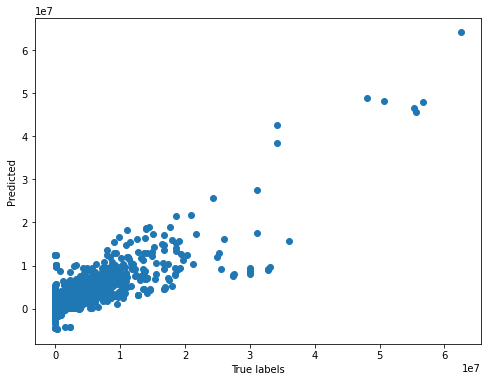

In [43]:
fig, axes = plt.subplots(figsize=(8,6))
axes.scatter(y_test.fillna(0), y_test_preds);
axes.set_xlabel("True labels")
axes.set_ylabel("Predicted")